In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [33]:
df=pd.read_csv("Readmissions and Deaths_Hospital.csv",encoding='latin1')

In [15]:
df.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name    Measure ID  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2  Death rate for chronic obstructive pulmonary d...  MORT_30_COPD   
3           Heart failure (HF) 30-Day Mortality Rate    MORT_30_HF   
4               Pneumonia (PN) 30-Day Mortality Rate    MORT_30_PN   

                  Compared to National Denominator Score Lower Estimate  \
0  No Different than the National Rate         733  12.5           10.6   
1  No Different than the National Rate         278   4.2            2.6   
2  No Different than the National Rate         586   9.3            7.3   
3  No Different than the National Rate         797  12.4           10.4   
4  No Different than the National Rate         599  15.5           13.0   

  Higher Estimate Footnote Measure Start Date Measure End Date  
0            14.9      NaN         07/01/2012       06/30/2015  
1             6.8      NaN         07/01/2012       06/30/2015  
2            11.8      NaN         07/01/2012       06/30/2015  
3            14.6      NaN         07/01/2012       06/30/2015  
4            18.5      NaN         07/01/2012       06/30/2015

In [16]:
df.shape

(67452, 18)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
Provider ID             67452 non-null int64
Hospital Name           67452 non-null object
Address                 67452 non-null object
City                    67452 non-null object
State                   67452 non-null object
ZIP Code                67452 non-null int64
County Name             67242 non-null object
Phone Number            67452 non-null int64
Measure Name            67452 non-null object
Measure ID              67452 non-null object
Compared to National    67452 non-null object
Denominator             67452 non-null object
Score                   67452 non-null object
Lower Estimate          67452 non-null object
Higher Estimate         67452 non-null object
Footnote                25742 non-null object
Measure Start Date      67452 non-null object
Measure End Date        67452 non-null object
dtypes: int64(3), object(15)
memory usage: 9.3+ MB


In [18]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID              0.00
Hospital Name            0.00
Address                  0.00
City                     0.00
State                    0.00
ZIP Code                 0.00
County Name              0.31
Phone Number             0.00
Measure Name             0.00
Measure ID               0.00
Compared to National     0.00
Denominator              0.00
Score                    0.00
Lower Estimate           0.00
Higher Estimate          0.00
Footnote                61.84
Measure Start Date       0.00
Measure End Date         0.00
dtype: float64

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [34]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(67452, 17)

In [35]:
df=df.dropna(axis=0, how='any')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67242 entries, 0 to 67395
Data columns (total 17 columns):
Provider ID             67242 non-null int64
Hospital Name           67242 non-null object
Address                 67242 non-null object
City                    67242 non-null object
State                   67242 non-null object
ZIP Code                67242 non-null int64
County Name             67242 non-null object
Phone Number            67242 non-null int64
Measure Name            67242 non-null object
Measure ID              67242 non-null object
Compared to National    67242 non-null object
Denominator             67242 non-null object
Score                   67242 non-null object
Lower Estimate          67242 non-null object
Higher Estimate         67242 non-null object
Measure Start Date      67242 non-null object
Measure End Date        67242 non-null object
dtypes: int64(3), object(14)
memory usage: 9.2+ MB


In [36]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67242 entries, 0 to 67395
Data columns (total 17 columns):
Provider ID             67242 non-null int64
Hospital Name           67242 non-null object
Address                 67242 non-null object
City                    67242 non-null object
State                   67242 non-null object
ZIP Code                67242 non-null int64
County Name             67242 non-null object
Phone Number            67242 non-null int64
Measure Name            67242 non-null object
Measure ID              67242 non-null object
Compared to National    67242 non-null object
Denominator             67242 non-null object
Score                   67242 non-null object
Lower Estimate          67242 non-null object
Higher Estimate         67242 non-null object
Measure Start Date      67242 non-null object
Measure End Date        67242 non-null object
dtypes: int64(3), object(14)
memory usage: 9.2+ MB


### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [37]:
df=df[~(df["Denominator"].isin(['Not Applicable','Not Available']))]# & (df["Score"].isin(['Not Applicable','Not Available'])) & (df["Lower Estimate"].isin(['Not Applicable','Not Available'])) & (df["Higher Estimate"].isin(['Not Applicable','Not Available']))]

In [38]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41645 entries, 0 to 67323
Data columns (total 13 columns):
Provider ID             41645 non-null int64
Hospital Name           41645 non-null object
ZIP Code                41645 non-null int64
County Name             41645 non-null object
Measure Name            41645 non-null object
Measure ID              41645 non-null object
Compared to National    41645 non-null object
Denominator             41645 non-null object
Score                   41645 non-null object
Lower Estimate          41645 non-null object
Higher Estimate         41645 non-null object
Measure Start Date      41645 non-null object
Measure End Date        41645 non-null object
dtypes: int64(2), object(11)
memory usage: 4.4+ MB


### Converting some categorical variables to numeric

In [40]:
df = df.replace(['Not Available','Not Applicable'],0)

In [42]:
df[["Denominator","Score","Lower Estimate","Higher Estimate"]] = df[["Denominator","Score","Lower Estimate","Higher Estimate"]].apply(pd.to_numeric,errors='coerce')


In [43]:
df=df.fillna(0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41645 entries, 0 to 67323
Data columns (total 13 columns):
Provider ID             41645 non-null int64
Hospital Name           41645 non-null object
ZIP Code                41645 non-null int64
County Name             41645 non-null object
Measure Name            41645 non-null object
Measure ID              41645 non-null object
Compared to National    41645 non-null object
Denominator             41645 non-null int64
Score                   41645 non-null float64
Lower Estimate          41645 non-null float64
Higher Estimate         41645 non-null float64
Measure Start Date      41645 non-null object
Measure End Date        41645 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 4.4+ MB


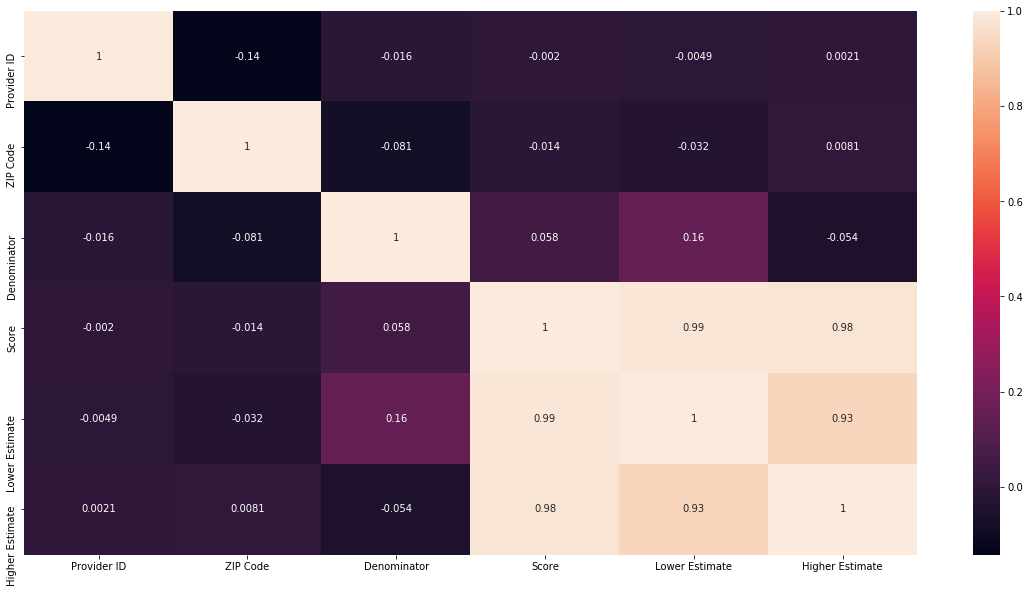

In [45]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [46]:
## Droppng Columns with high correlation -
df = df.drop(['Lower Estimate', 'Higher Estimate'], axis=1)

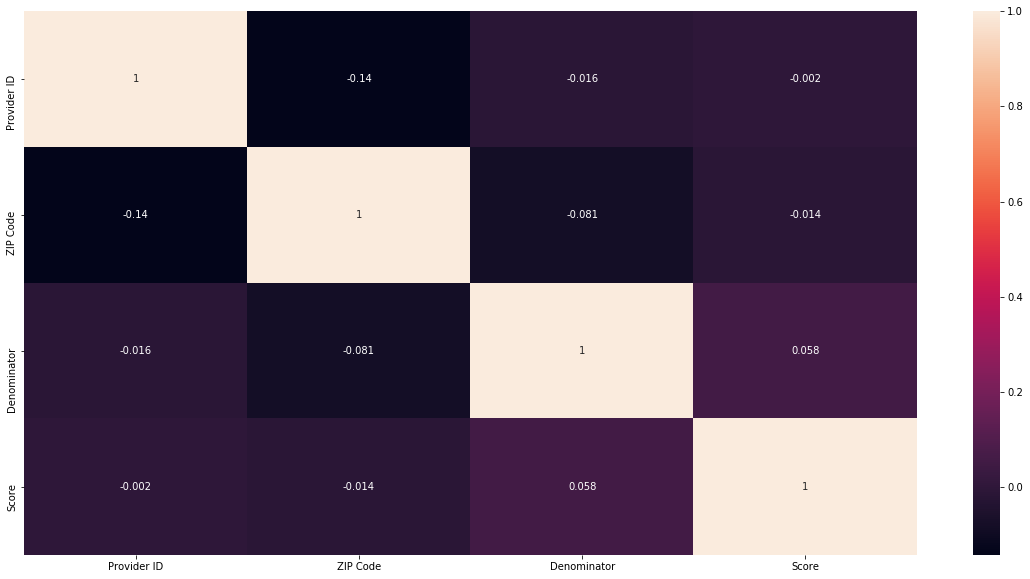

In [47]:
# Let's see the correlation matrix again
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [48]:
df.to_csv('Readmissions and Deaths.csv')

In [49]:
RnDeaths = df[:]
RnDeaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41645 entries, 0 to 67323
Data columns (total 11 columns):
Provider ID             41645 non-null int64
Hospital Name           41645 non-null object
ZIP Code                41645 non-null int64
County Name             41645 non-null object
Measure Name            41645 non-null object
Measure ID              41645 non-null object
Compared to National    41645 non-null object
Denominator             41645 non-null int64
Score                   41645 non-null float64
Measure Start Date      41645 non-null object
Measure End Date        41645 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 3.8+ MB
